In [22]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from matplotlib.colors import LogNorm
%matplotlib widget

In [11]:
path = "/ibira/lnls/beamlines/caterete/proposals/20231616/data/pwcdi3d/mcm22pristine08/scans/mcm22pristine08_000.hdf5"

path_ff = "/ibira/lnls/beamlines/caterete/proposals/20231616/data/pwcdi3d/mcm22pristine08/images/flat.hdf5"

In [3]:
data = h5py.File(path, 'r')['entry/data/data'][()]
data.shape

(1302, 1, 3072, 3072)

In [13]:
ff = h5py.File(path_ff, 'r')['entry/data/data'][()][0]
ff.shape

(3072, 3072)

In [30]:
frame = data[0,0]
frame2 = data[1,0]

dp = frame2*ff# - frame*ff
dp[dp>=1] = 0

print(f'Flux = {np.sum(dp):.2e}')
print(f'Flux/second = {np.sum(dp)/5:.2e}')
print(f'Max/sec = {np.max(dp)/5}')

Flux = 1.98e+05
Flux/second = 3.96e+04
Max/sec = 0.19999980926513672


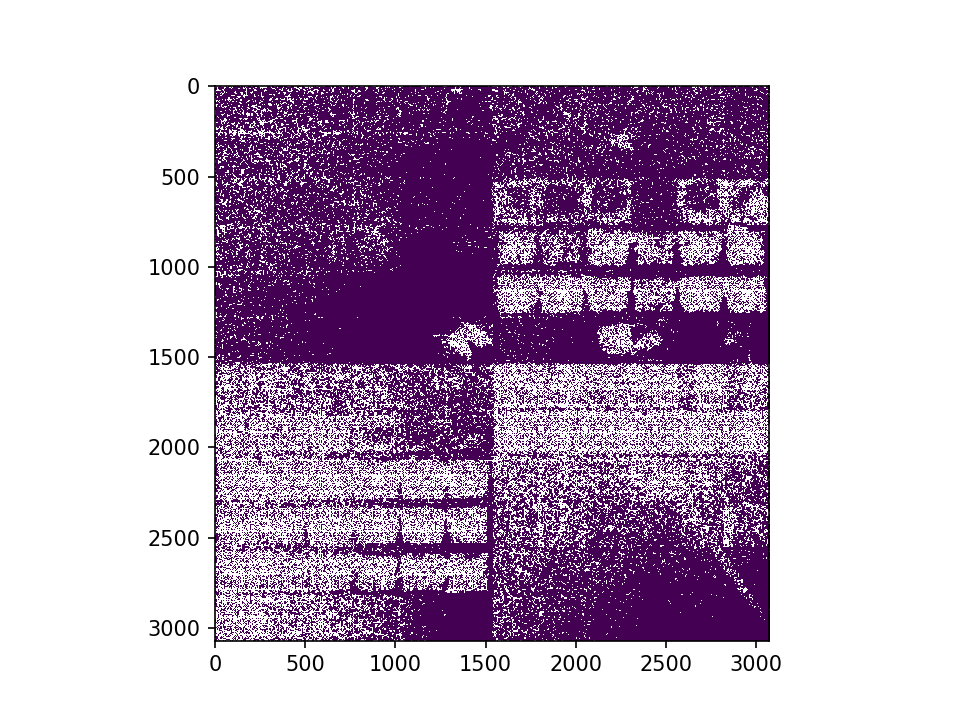

In [31]:
fig, ax = plt.subplots(dpi=150)
ax.imshow(dp,norm=LogNorm())